<a href="https://colab.research.google.com/github/salmaDiab/SalmTrialTutorial/blob/main/Copy_of_Copy_of_Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Salma Walid

ID: 46-8424

Tutorial: T-04

---

Name: Mohamed Dessouki

ID: 46-6684

Tutorial: T-02

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [2]:
#Checking for inconsistencies
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges: ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']

TotalCharges: ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']

Churn: ['No' 'Yes']



## Data Pre-processing

In [3]:
df.dropna(axis=0, how='any', thresh=None, subset=["customerID"], inplace=True)
#print("null value count in the whole df/table is: ",df.isnull().sum().sum())
#print("Null value in each column :\n",df.isnull().sum())
#(removing unnecessary characters ("/m","$"), reassigning colun types to suitable ones
print("Dropping rows with CustomerID nan values" , df.dropna(axis=0, how='any', thresh=None, subset=["customerID"], inplace=True))
df["MonthlyCharges"] = df["MonthlyCharges"].str.replace("/m","",regex=False)
df["MonthlyCharges"] = df["MonthlyCharges"].str.replace("$","",regex=False).astype(float)
df["TotalCharges"] = df["TotalCharges"].str.replace("$","",regex=False).astype(float)
#filling missing total charges by the result of (Mean of column total charges
df.TotalCharges.fillna(df["TotalCharges"].mean(), inplace=True)
#to check for the changes applied
print("Null value in each column :\n",df.isnull().sum())
print(df.info())
print(df.head(25))
df.loc[df['MultipleLines'].str.contains('No phone service', case=False), 'MultipleLines'] = 'No'
df.loc[df['OnlineSecurity'].str.contains('No internet service', case=False), 'OnlineSecurity'] = 'No'
df.loc[df['OnlineBackup'].str.contains('No internet service', case=False), 'OnlineBackup'] = 'No'
df.loc[df['DeviceProtection'].str.contains('No internet service', case=False), 'DeviceProtection'] = 'No'
df.loc[df['TechSupport'].str.contains('No internet service', case=False), 'TechSupport'] = 'No'
df.loc[df['StreamingTV'].str.contains('No internet service', case=False), 'StreamingTV'] = 'No'
df.loc[df['StreamingMovies'].str.contains('No internet service', case=False), 'StreamingMovies'] = 'No'
df_le = df.copy()
#To change the table from categorical to numerical (encoding)
col = df_le.select_dtypes(include= [object, 'category']).columns
df_le[col]= df_le[col].transform(lambda x: x.astype('category').cat.codes)
for col in df_le.select_dtypes(object).columns:
    print(f"{col}: {df_le[col].unique()}\n")
df_le.head()


Dropping rows with CustomerID nan values None
Null value in each column :
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6976 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   gender            6976 non-null   object 
 2   SeniorCitizen     6976 non-null   int64  
 3   Partner           6976 non-null   object 
 4   Dependents        6976 non-null   object 
 5   tenure   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5324,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,3921,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,2539,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,5483,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,6449,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

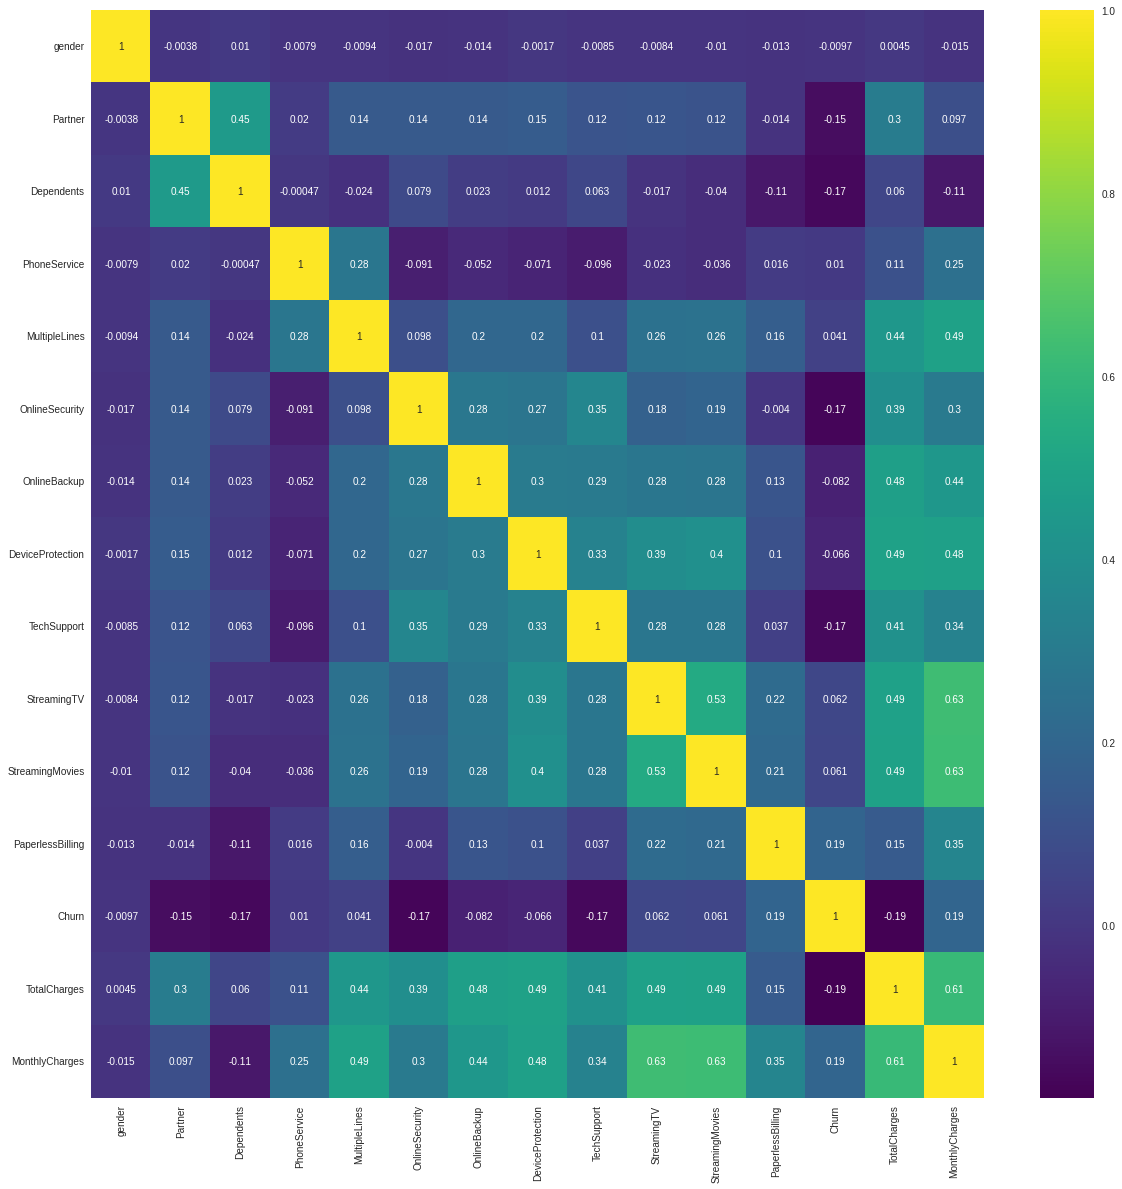

In [4]:
# df_le_churn = df_le[df_le["Churn"]== 1]
# df_le_churn
Table1= df_le[['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'TotalCharges', 'MonthlyCharges']]
corr = Table1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis', annot=True)
plt.show()


**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

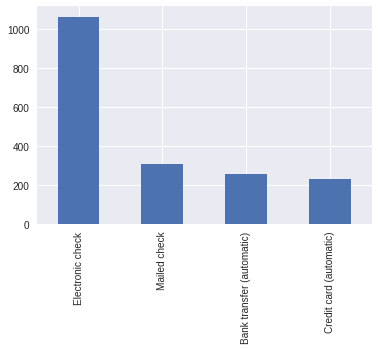

In [5]:
df_churn_filter = df[df["Churn"]== "Yes"]
df_Payment_Churn = df_churn_filter["PaymentMethod"].value_counts().plot(kind='bar')
plt.show()

**Answer for Q2**: Your answer here

**Q3: After how many months do customers commonly churn?** (Hint: show and 

---

interpret the distribution)

**Visualization**

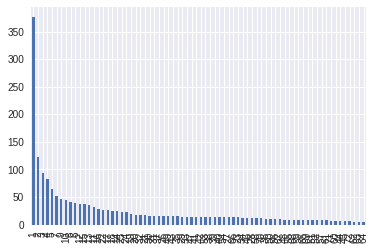

In [6]:
df_churn_filter = df[df["Churn"]== "Yes"]
df_tenure_Churn = df_churn_filter["tenure"].value_counts().plot(kind='bar')
plt.show()

**Answer for Q3**: Your answer here

## Modelling

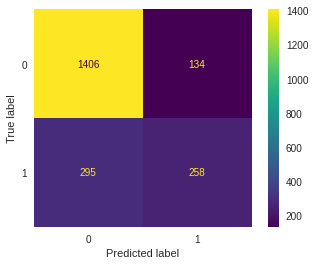

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X_le = df_le.drop('Churn', axis=1)
y_le = df_le['Churn']
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.3, random_state=42)


random_forest_clf_le = RandomForestClassifier(random_state=42)
random_forest_clf_le.fit(X_train_le, y_train_le)

features = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'MonthlyCharges']
X = df_le[features]
y = df_le['Churn']
dtree = DecisionTreeClassifier()
dtree.fit(X_train_le, y_train_le)
dtree.fit(X_test_le, y_test_le)
dtree = dtree.fit(X, y)

ConfusionMatrixDisplay.from_estimator(random_forest_clf_le ,X_test_le, y_test_le)
plt.grid(False)
plt.show()

## Evaluation

In [4]:
#dtree.score(X_test_le, y_test_le)

NameError: ignored

## Decision Tree Visualization

[Text(154.98940884518294, 214.85142857142856, 'X[4] <= 68.825\ngini = 0.39\nsamples = 6976\nvalue = [5121, 1855]'),
 Text(71.50268854765099, 209.6742857142857, 'X[4] <= 27.675\ngini = 0.273\nsamples = 3258\nvalue = [2727, 531]'),
 Text(35.20718444090634, 204.49714285714285, 'X[1] <= 0.5\ngini = 0.169\nsamples = 1587\nvalue = [1439, 148]'),
 Text(26.321444246541688, 199.32, 'X[4] <= 20.875\ngini = 0.23\nsamples = 839\nvalue = [728, 111]'),
 Text(19.407111034469725, 194.14285714285714, 'X[4] <= 20.275\ngini = 0.203\nsamples = 636\nvalue = [563, 73]'),
 Text(14.872820602464284, 188.96571428571428, 'X[4] <= 20.075\ngini = 0.228\nsamples = 480\nvalue = [417, 63]'),
 Text(10.410302177035302, 183.78857142857143, 'X[4] <= 19.875\ngini = 0.202\nsamples = 394\nvalue = [349, 45]'),
 Text(4.420997429888881, 178.61142857142858, 'X[4] <= 19.225\ngini = 0.227\nsamples = 283\nvalue = [246, 37]'),
 Text(0.4049285660291783, 173.43428571428572, 'X[3] <= 0.5\ngini = 0.12\nsamples = 47\nvalue = [44, 3]'),


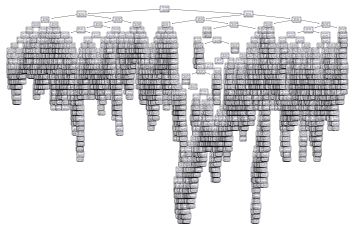

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree.plot_tree(dtree)

## Bonus (Optional)